In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import the requests library.
import requests
from citipy import citipy
#import the API key

from config import weather_api_key

# Import linregress
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)
coordinates

In [3]:
city_data = []

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

     # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
     
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | palmer
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | gorontalo
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | lagunas
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | pangnirtung
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | baie-saint-paul
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | cervo
Processing Record 19 of Set 1 | bethanien
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | biloela
Processing Record 40 of Set 4 | fort nelson
Processing Record 41 of Set 4 | tselinnoye
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | dzheguta
Processing Record 44 of Set 4 | zambrow
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | cap malheureux
Processing Record 47 of Set 4 | boyolangu
Processing Record 48 of Set 4 | thinadhoo
Processing Record 49 of Set 4 | barrow
Processing Record 50 of Set 4 | putina
Processing Record 1 of Set 5 | chagda
City not found. Skipping...
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processing Record 4 of Set 5 | saint-pierre
Processing Record 5 of Set 5 | kloulklubed
Processing Record 6 of Set 5 | leshan
Processing Record 7 of Set 5 | florianopolis
Processing Record 8 of Set 5 | picayune
Processing Record 9 of Set 5 | acajutla
Processing Record 10 of Set 5 | tsiroanoman

Processing Record 30 of Set 8 | panguna
Processing Record 31 of Set 8 | lincoln
Processing Record 32 of Set 8 | tevaitoa
Processing Record 33 of Set 8 | suba
Processing Record 34 of Set 8 | umm ruwabah
City not found. Skipping...
Processing Record 35 of Set 8 | bathsheba
Processing Record 36 of Set 8 | sao joao do piaui
Processing Record 37 of Set 8 | heyang
Processing Record 38 of Set 8 | grindavik
Processing Record 39 of Set 8 | skibbereen
Processing Record 40 of Set 8 | rantepao
Processing Record 41 of Set 8 | saint-augustin
Processing Record 42 of Set 8 | fortuna foothills
Processing Record 43 of Set 8 | kushima
Processing Record 44 of Set 8 | praia
Processing Record 45 of Set 8 | sakti
Processing Record 46 of Set 8 | havre-saint-pierre
Processing Record 47 of Set 8 | pangai
Processing Record 48 of Set 8 | hoquiam
Processing Record 49 of Set 8 | rapid valley
Processing Record 50 of Set 8 | arlit
Processing Record 1 of Set 9 | nemuro
Processing Record 2 of Set 9 | potgietersrus
City

Processing Record 17 of Set 12 | pantai remis
Processing Record 18 of Set 12 | huarmey
Processing Record 19 of Set 12 | karpogory
Processing Record 20 of Set 12 | traian
Processing Record 21 of Set 12 | phumi samraong
City not found. Skipping...
Processing Record 22 of Set 12 | atar
Processing Record 23 of Set 12 | port lincoln
Processing Record 24 of Set 12 | donnacona
Processing Record 25 of Set 12 | charlottesville
Processing Record 26 of Set 12 | davlekanovo
Processing Record 27 of Set 12 | heishan
Processing Record 28 of Set 12 | trutnov
Processing Record 29 of Set 12 | auki
Processing Record 30 of Set 12 | kautokeino
Processing Record 31 of Set 12 | orange cove
Processing Record 32 of Set 12 | ulundi
Processing Record 33 of Set 12 | russell
Processing Record 34 of Set 12 | lazaro cardenas
Processing Record 35 of Set 12 | kingaroy
Processing Record 36 of Set 12 | radcliff
Processing Record 37 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 38 of Set 12 | beckl

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palmer,42.1584,-72.3287,49.24,69,75,6.91,US,2022-10-03 02:48:31
1,East London,-33.0153,27.9116,65.88,86,38,18.59,ZA,2022-10-03 02:41:12
2,Mount Gambier,-37.8333,140.7667,68.13,50,70,2.01,AU,2022-10-03 02:48:31
3,Gorontalo,0.5412,123.0595,87.57,63,62,6.22,ID,2022-10-03 02:44:38
4,Bluff,-46.6000,168.3333,47.80,51,97,19.04,NZ,2022-10-03 02:42:17
5,Pacific Grove,36.6177,-121.9166,64.51,82,0,4.61,US,2022-10-03 02:48:32
6,Saskylakh,71.9167,114.0833,25.34,95,98,10.96,RU,2022-10-03 02:43:25
7,Lagunas,-5.2269,-75.6753,75.16,75,93,1.72,PE,2022-10-03 02:48:32
8,Provideniya,64.3833,-173.3000,39.36,81,40,13.42,RU,2022-10-03 02:47:07
9,Pangnirtung,66.1451,-65.7125,29.53,64,11,2.64,CA,2022-10-03 02:48:33


In [10]:
df=pd.DataFrame(city_data)
df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity" ,"Cloudiness", "Wind Speed"]
df = df[new_column_order]
print(df)

              City Country                 Date      Lat       Lng  Max Temp  \
0           Palmer      US  2022-10-03 02:48:31  42.1584  -72.3287     49.24   
1      East London      ZA  2022-10-03 02:41:12 -33.0153   27.9116     65.88   
2    Mount Gambier      AU  2022-10-03 02:48:31 -37.8333  140.7667     68.13   
3        Gorontalo      ID  2022-10-03 02:44:38   0.5412  123.0595     87.57   
4            Bluff      NZ  2022-10-03 02:42:17 -46.6000  168.3333     47.80   
..             ...     ...                  ...      ...       ...       ...   
549  Ponta Delgada      PT  2022-10-03 03:03:27  37.7333  -25.6667     74.50   
550     Trzebiatow      PL  2022-10-03 03:03:28  54.0615   15.2648     56.86   
551       Lovozero      RU  2022-10-03 03:03:28  68.0050   35.0117     39.16   
552   Kudahuvadhoo      MV  2022-10-03 03:03:28   2.6708   72.8944     81.75   
553       Moussoro      TD  2022-10-03 03:03:29  13.6408   16.4901     83.64   

     Humidity  Cloudiness  Wind Speed  

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

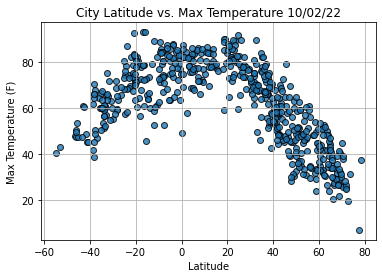

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

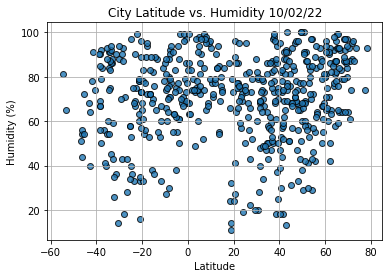

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

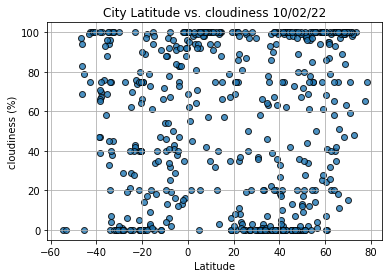

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

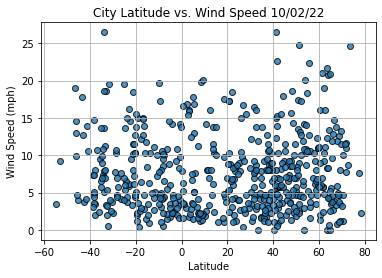

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

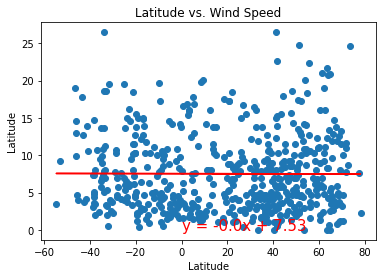

In [31]:
plot_linear_regression(lats, wind_speed, "Latitude vs. Wind Speed", "Latitude", (0,0))

In [24]:
index13 = city_data_df.loc[13]
index13


City                   Georgetown
Lat                        5.4112
Lng                      100.3354
Max Temp                    84.13
Humidity                       81
Cloudiness                     20
Wind Speed                   5.01
Country                        MY
Date          2022-10-03 02:41:23
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
549     True
550     True
551     True
552     True
553     True
Name: Lat, Length: 554, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palmer,42.1584,-72.3287,49.24,69,75,6.91,US,2022-10-03 02:48:31
3,Gorontalo,0.5412,123.0595,87.57,63,62,6.22,ID,2022-10-03 02:44:38
5,Pacific Grove,36.6177,-121.9166,64.51,82,0,4.61,US,2022-10-03 02:48:32
6,Saskylakh,71.9167,114.0833,25.34,95,98,10.96,RU,2022-10-03 02:43:25
8,Provideniya,64.3833,-173.3000,39.36,81,40,13.42,RU,2022-10-03 02:47:07
...,...,...,...,...,...,...,...,...,...
549,Ponta Delgada,37.7333,-25.6667,74.50,83,20,11.50,PT,2022-10-03 03:03:27
550,Trzebiatow,54.0615,15.2648,56.86,85,20,20.07,PL,2022-10-03 03:03:28
551,Lovozero,68.0050,35.0117,39.16,89,100,5.84,RU,2022-10-03 03:03:28
552,Kudahuvadhoo,2.6708,72.8944,81.75,74,100,15.39,MV,2022-10-03 03:03:28


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palmer,42.1584,-72.3287,49.24,69,75,6.91,US,2022-10-03 02:48:31
3,Gorontalo,0.5412,123.0595,87.57,63,62,6.22,ID,2022-10-03 02:44:38
5,Pacific Grove,36.6177,-121.9166,64.51,82,0,4.61,US,2022-10-03 02:48:32
6,Saskylakh,71.9167,114.0833,25.34,95,98,10.96,RU,2022-10-03 02:43:25
8,Provideniya,64.3833,-173.3000,39.36,81,40,13.42,RU,2022-10-03 02:47:07


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

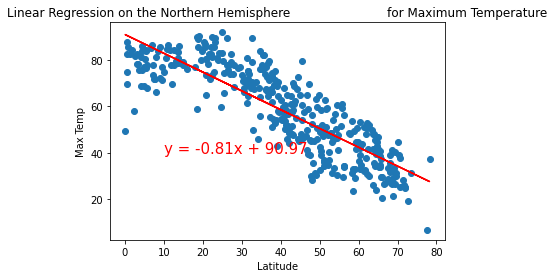

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

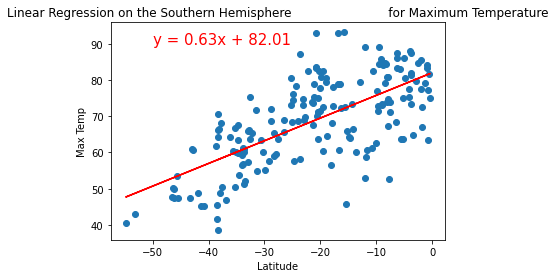

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

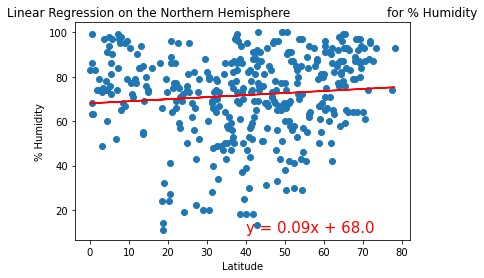

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

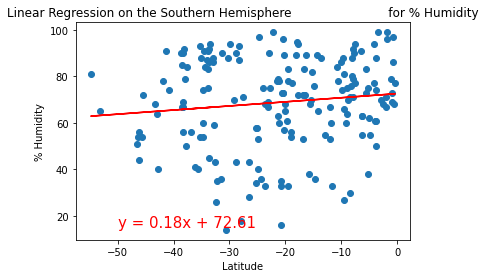

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

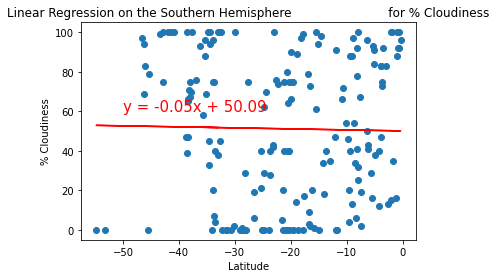

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

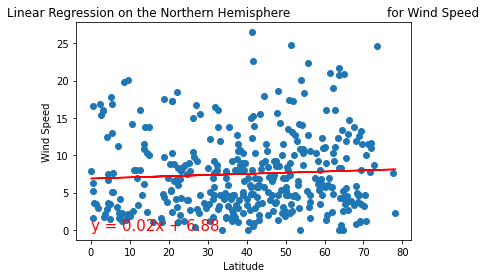

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,0))

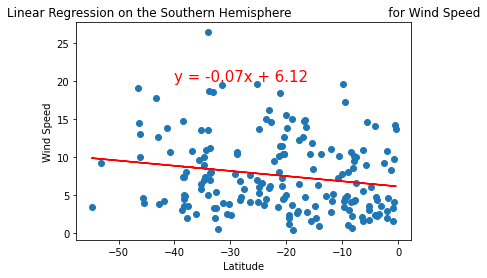

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,20))